In [2]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from pathlib import Path
import os
import datetime

In [3]:
cur_dir = Path.cwd()
path = str(cur_dir.parent.parent) + '/data/SEED/SEED_EEG/Preprocessed_EEG/'
files = os.listdir(path)
print(files)

['13_20140603.mat', '2_20140419.mat', '11_20140618.mat', '11_20140630.mat', '15_20131016.mat', '12_20131201.mat', '11_20140625.mat', '4_20140621.mat', '5_20140418.mat', '6_20131016.mat', '8_20140521.mat', '14_20140615.mat', '14_20140601.mat', '12_20131207.mat', 'label.mat', '13_20140610.mat', '15_20130709.mat', '7_20131106.mat', '9_20140627.mat', '10_20131130.mat', '6_20131113.mat', '1_20131107.mat', '9_20140620.mat', '15_20131105.mat', '4_20140702.mat', '5_20140506.mat', '4_20140705.mat', '12_20131127.mat', '13_20140527.mat', 'readme.txt', '2_20140404.mat', '7_20131027.mat', '3_20140629.mat', '6_20130712.mat', '5_20140411.mat', '2_20140413.mat', '10_20131211.mat', '8_20140514.mat', '7_20131030.mat', '3_20140603.mat', '9_20140704.mat', '10_20131204.mat', '8_20140511.mat', '1_20131027.mat', '14_20140627.mat', '3_20140611.mat', '1_20131030.mat']


In [4]:
label_file_mat = scipy.io.loadmat(path + 'label.mat')
labels = label_file_mat['label']
print(labels.shape)

(1, 15)


In [9]:
i = 2
mat = scipy.io.loadmat(path + files[i])
print(files[i])
print(mat.keys())
print(mat['__header__'])
print(mat['__version__'])
print(mat['__globals__'])
sr = 200.

11_20140618.mat
dict_keys(['__header__', '__version__', '__globals__', 'wsf_eeg1', 'wsf_eeg2', 'wsf_eeg3', 'wsf_eeg4', 'wsf_eeg5', 'wsf_eeg6', 'wsf_eeg7', 'wsf_eeg8', 'wsf_eeg9', 'wsf_eeg10', 'wsf_eeg11', 'wsf_eeg12', 'wsf_eeg13', 'wsf_eeg14', 'wsf_eeg15'])
b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jul 07 17:57:31 2014'
1.0
[]


In [4]:
data = mat['xyl_eeg2']
print(data.shape)

(62, 46601)


In [5]:
excel_path = str(cur_dir.parent.parent) + '/data/SEED/SEED_EEG/SEED_stimulation.xlsx'
label_file = pd.read_excel(excel_path)
print(label_file.keys())

Index(['Name of the clip', 'Label', 'Source url', 'Start time point',
       'End time point'],
      dtype='object')


In [6]:
for i in range(len(label_file)):
    if label_file['Label'][i] in [0., 1., 2.]:

        print((datetime.datetime.combine(datetime.datetime.today(), label_file['End time point'][i]) - datetime.datetime.combine(datetime.datetime.today(), label_file['Start time point'][i])).total_seconds())

238.0
226.0
205.0
242.0
184.0
199.0
240.0
220.0
266.0
241.0
237.0
240.0
240.0
242.0
205.0


In [7]:
sec = int(data.shape[1]/sr)
print(sec)
print(sec//60, "min", sec%60)

233
3 min 53


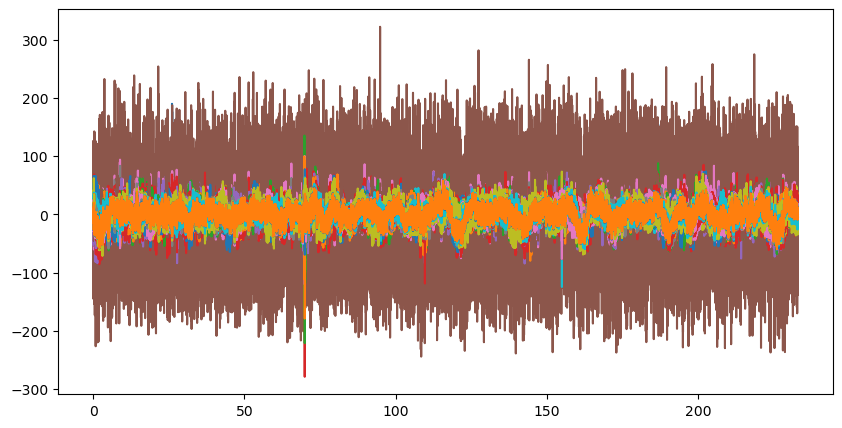

In [8]:
time = np.arange(data.shape[1])/sr
plt.figure(figsize=(10, 5))
plt.plot(time, data.T)
plt.show()

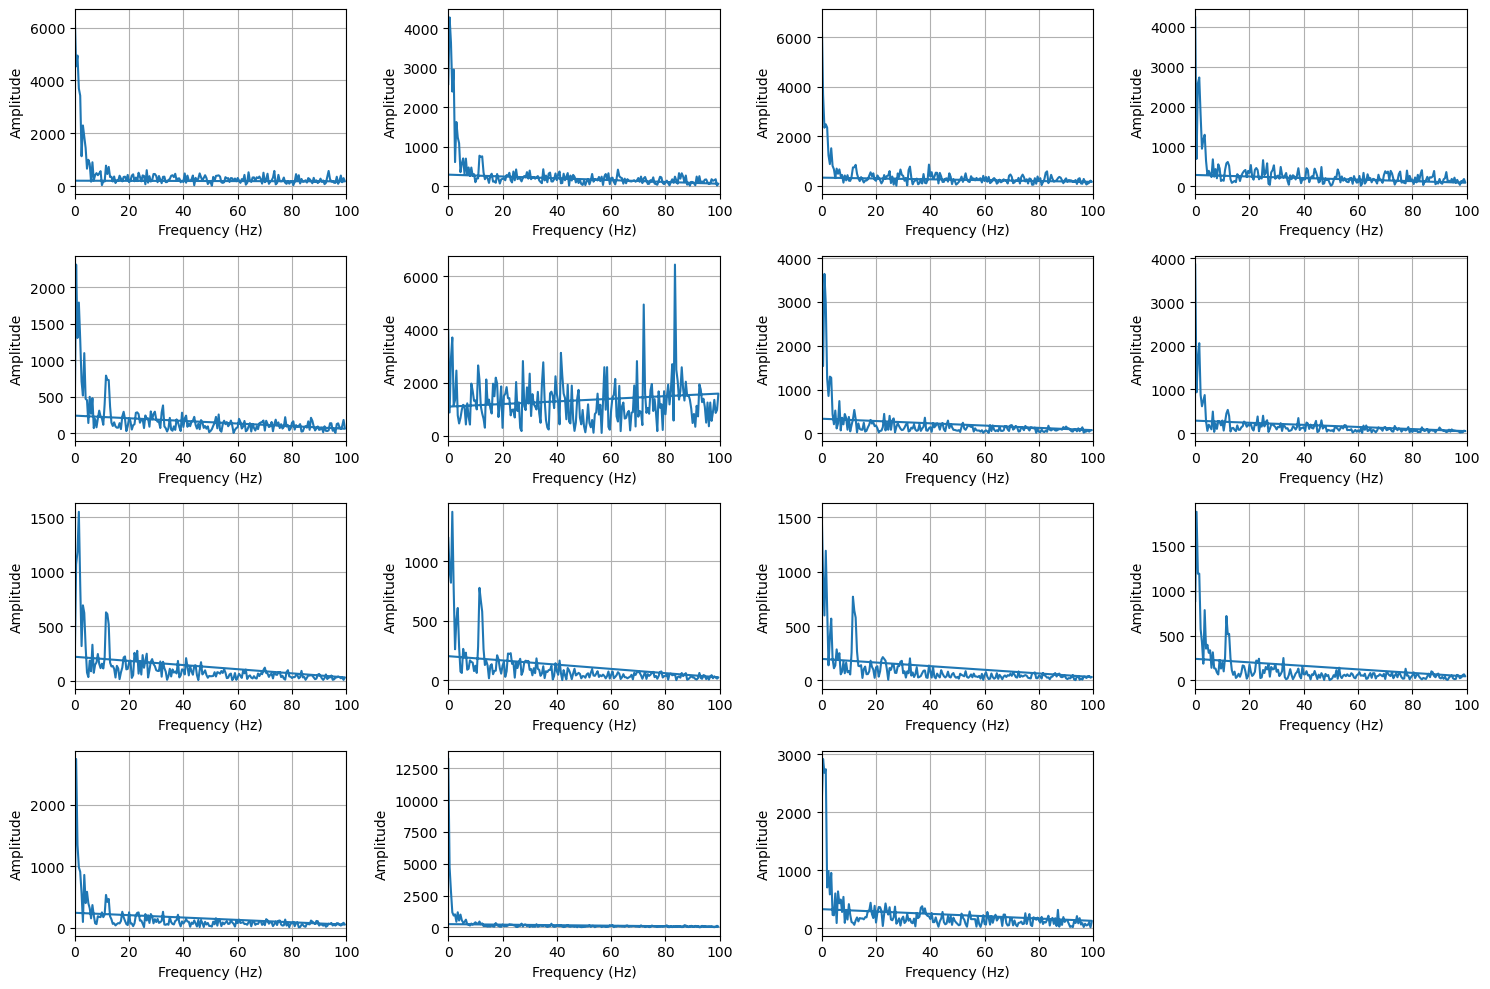

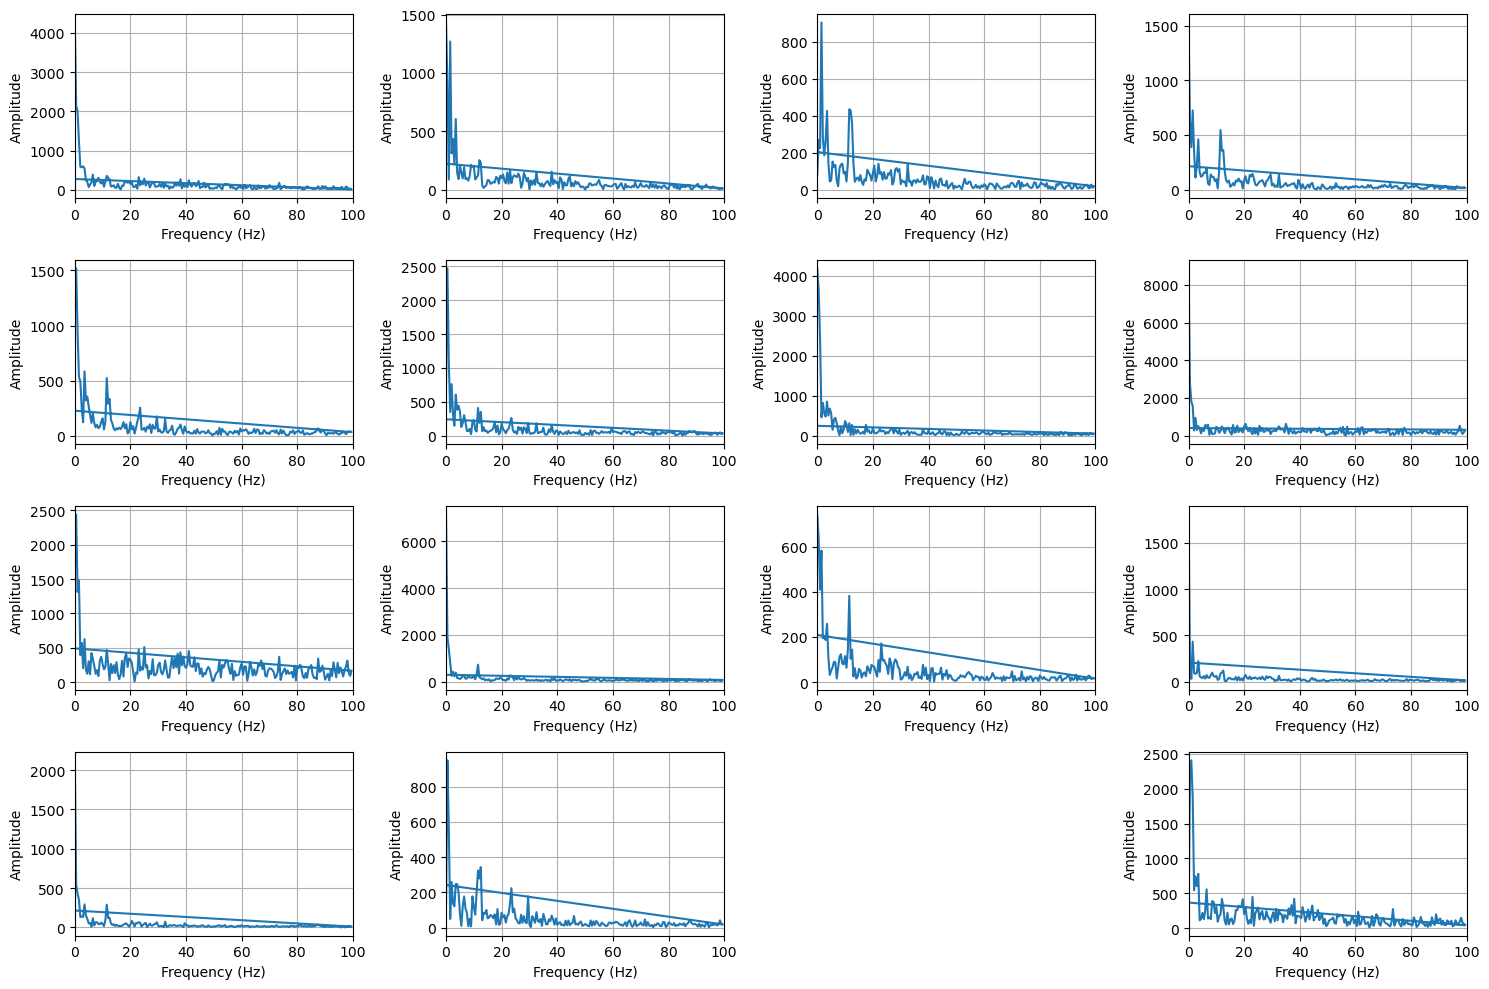

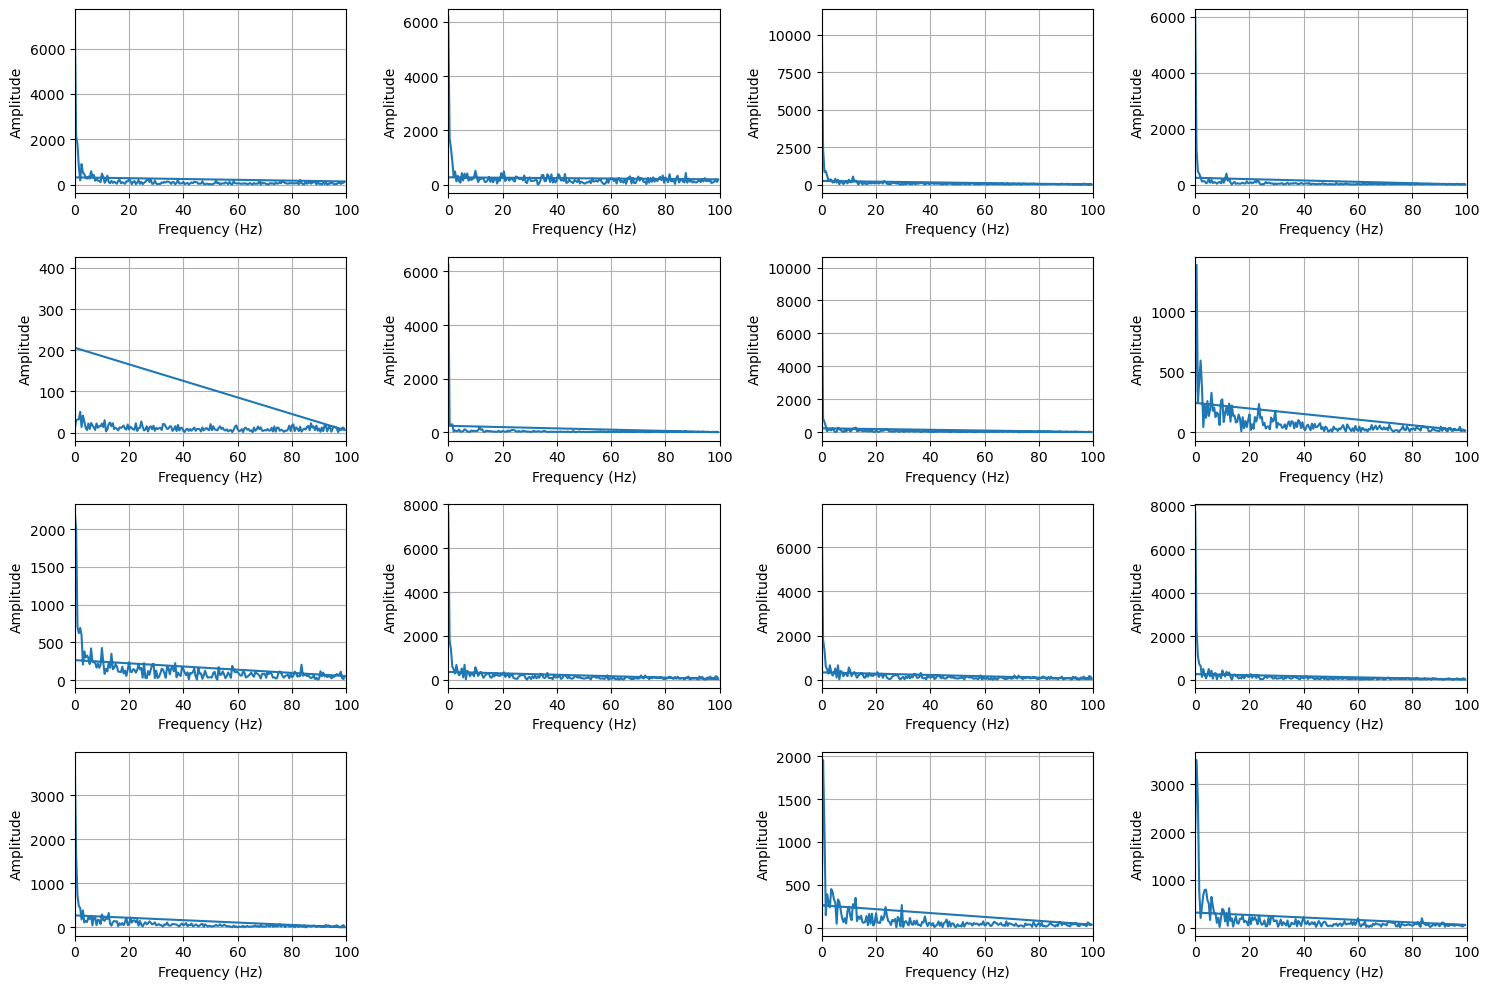

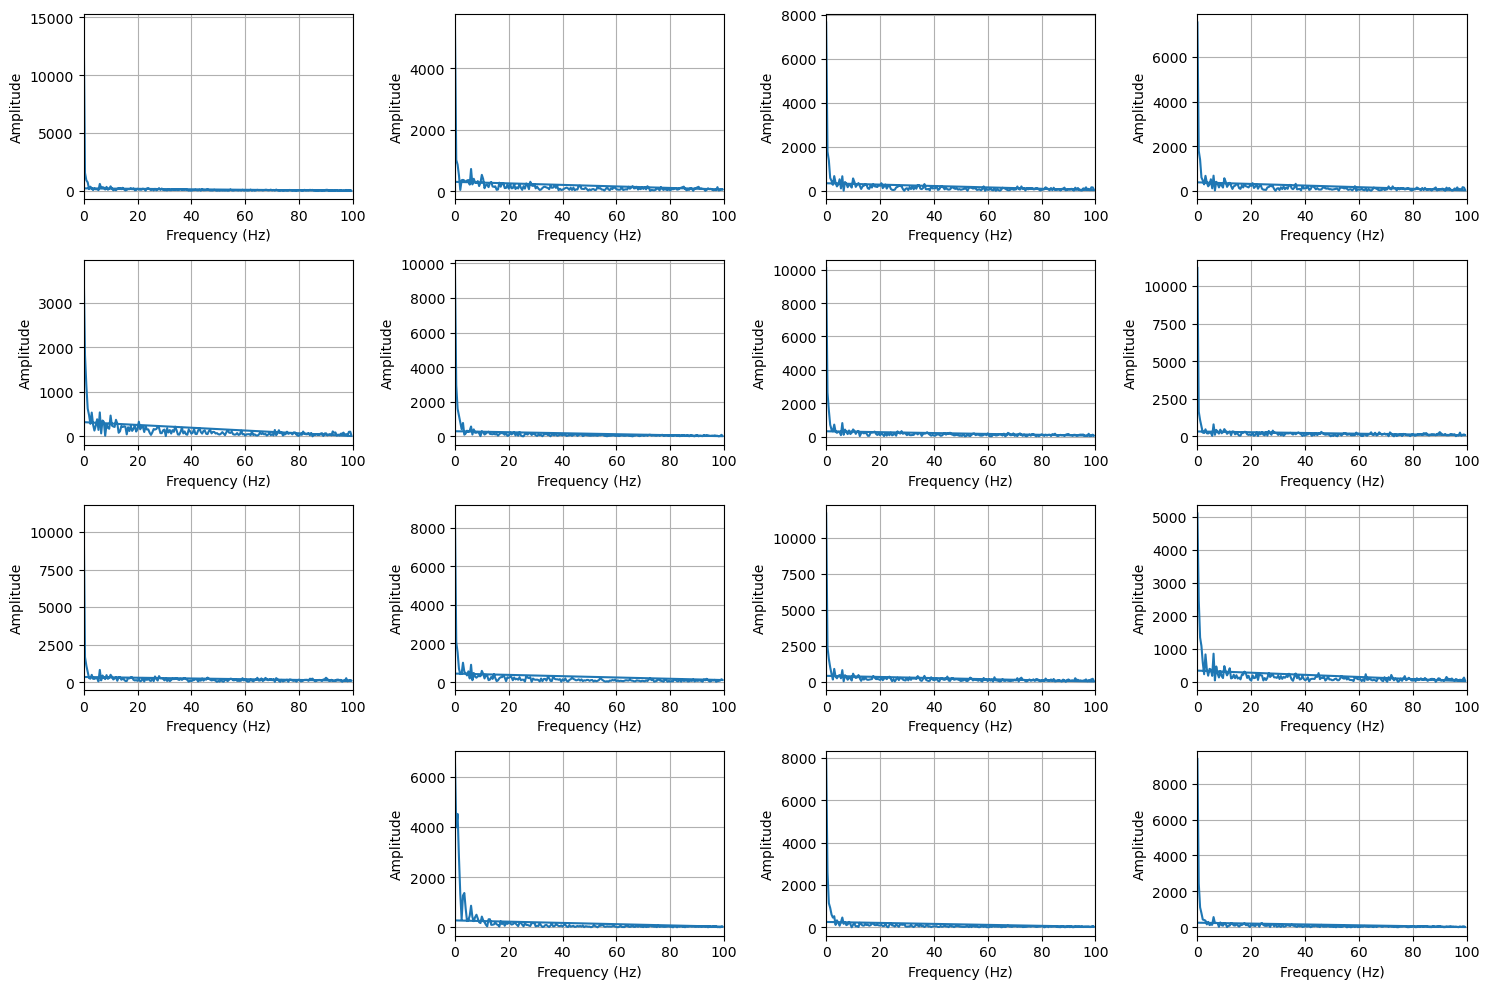

In [12]:
for j in range(4):
    plt.figure(figsize=(15, 10))
    for i in range((data.shape[0]//4)*j, min(data.shape[0], (data.shape[0]//4)*(j+1))):
        s = data[i, 400:800]
        # s = s - np.mean(s)
        # s = s / np.std(s)
        fft_result = fft(s)

        # Calculate the frequencies corresponding to the FFT result
        frequencies = fftfreq(len(s), 1 / sr)
        # Plot the frequency spectrum
        plt.subplot(4, 4, i%16+1)
        plt.plot(frequencies, np.abs(fft_result))
        plt.xlabel('Frequency (Hz)')
        plt.xlim([0, sr/2])
        plt.ylabel('Amplitude')
        plt.grid(True)
    plt.tight_layout()
    plt.show()